<a href="https://colab.research.google.com/github/RishabhMehra/DLCVNLP/blob/main/DLCVNLP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sat May 29 12:47:35 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   74C    P0    32W /  70W |    228MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf


In [ ]:
tf.version


<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>

In [ ]:
!pip install torch==1.8.1+cpu torchvision==0.9.1+cpu torchaudio==0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(X_train_full,Y_train_full) ,(X_test,Y_test) = mnist.load_data()

In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
Y_train_full.shape

(60000,)

In [ ]:
#validation from full
#scale data
x_valid,x_train = X_train_full[:50000]/255.,X_train_full[50000:]/255.
y_valid,y_train = Y_train_full[:50000],Y_train_full[50000:]


#scale test set
X_test = X_test/255.

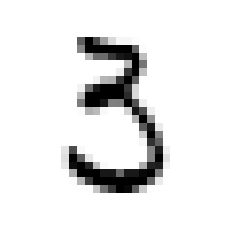

In [ ]:
plt.imshow(x_train[7],cmap='binary')
plt.axis('off')
plt.show()

In [ ]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28],name="inputLayer"),
          tf.keras.layers.Dense(150,activation='relu',name='hiddenLayer1'),
          tf.keras.layers.Dense(100, activation='relu',name='hiddenLayer2'),
          tf.keras.layers.Dense(10,activation='softmax',name='outlayer')]

In [ ]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [ ]:
model_clf.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer1 (Dense)         (None, 150)               117750    
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 100)               15100     
_________________________________________________________________
outlayer (Dense)             (None, 10)                1010      
Total params: 133,860
Trainable params: 133,860
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
weights.shape

(784, 150)

In [ ]:
biases.shape

(150,)

In [ ]:
model_clf.compile(loss=tf.losses.sparse_categorical_crossentropy,
                  optimizer= tf.keras.optimizers.SGD(0.02),
                  metrics=['accuracy'])

In [ ]:
Epochs =30
validation_set = (x_valid,y_valid)

history = model_clf.fit(x_train,y_train,epochs=Epochs,
                        validation_data=validation_set,batch_size=25)

Epoch 1/30
400/400 [==============================] - 7s 9ms/step - loss: 0.9312 - accuracy: 0.7637 - val_loss: 0.4863 - val_accuracy: 0.8650
Epoch 2/30
400/400 [==============================] - 3s 7ms/step - loss: 0.3634 - accuracy: 0.8980 - val_loss: 0.3729 - val_accuracy: 0.8912
Epoch 3/30
400/400 [==============================] - 3s 8ms/step - loss: 0.2918 - accuracy: 0.9166 - val_loss: 0.3446 - val_accuracy: 0.8998
Epoch 4/30
400/400 [==============================] - 3s 7ms/step - loss: 0.2529 - accuracy: 0.9288 - val_loss: 0.3068 - val_accuracy: 0.9091
Epoch 5/30
400/400 [==============================] - 3s 8ms/step - loss: 0.2240 - accuracy: 0.9363 - val_loss: 0.2918 - val_accuracy: 0.9148
Epoch 6/30
400/400 [==============================] - 3s 8ms/step - loss: 0.2012 - accuracy: 0.9437 - val_loss: 0.2789 - val_accuracy: 0.9192
Epoch 7/30
400/400 [==============================] - 3s 7ms/step - loss: 0.1826 - accuracy: 0.9485 - val_loss: 0.2618 - val_accuracy: 0.9235
Epoch 

In [ ]:
import time
import os
ROOT='/content/drive/MyDrive/DLCVNLP'
os.chdir(ROOT)
os.getcwd()

'/content/drive/MyDrive/DLCVNLP'

In [ ]:
def saveModel_path(model_dir="SAVED_MODELS"):
  os.makedirs(model_dir,exist_ok=True)
  fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(model_dir,fileName)
  print(f"your model will be saved at the following location\n{model_path}")
  return model_path

In [ ]:
Unique_Path =  model_clf.save(saveModel_path())

your model will be saved at the following location
SAVED_MODELS/Model_2021_05_29_13_07_36_.h5


In [ ]:
history.params

{'epochs': 30, 'steps': 400, 'verbose': 1}

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.931205,0.7637,0.486269,0.86500
1,0.363408,0.8980,0.372942,0.89116
2,0.291793,0.9166,0.344560,0.89976
3,0.252852,0.9288,0.306767,0.90912
4,0.223961,0.9363,0.291807,0.91484
5,0.201164,0.9437,0.278866,0.91922
6,0.182572,0.9485,0.261796,0.92348
7,0.165724,0.9542,0.255033,0.92446
8,0.149586,0.9589,0.245944,0.92782
9,0.137335,0.9629,0.237544,0.93056


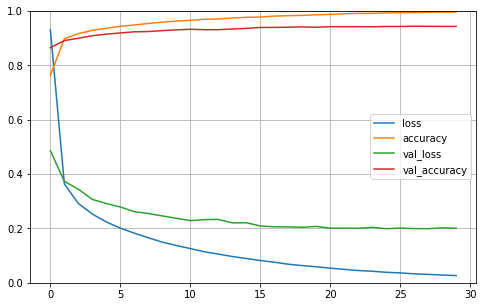

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model_clf.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1707 - accuracy: 0.9517


[0.170734703540802, 0.95169997215271]